In [1]:
import pandas as pd
import numpy as np
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# kmeans
from sklearn.cluster import KMeans
# 경고창 표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('.\SUV_Purchase.csv', encoding='utf-8')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
df.shape

(400, 4)

In [50]:
# 성별 더미변수화
df2 = pd.get_dummies(df, columns = ['Gender'])
df2

,Age,EstimatedSalary,Purchased,category,Gender_Female,Gender_Male
0,19,19000,0,1,0,1
1,35,20000,0,1,0,1
2,26,43000,0,1,1,0
3,27,57000,0,0,1,0
4,19,76000,0,0,0,1
...,...,...,...,...,...,...
395,46,41000,1,1,1,0
396,51,23000,1,1,0,1
397,50,20000,1,1,1,0
398,36,33000,0,1,0,1


In [64]:
# 데이터셋 나누기
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

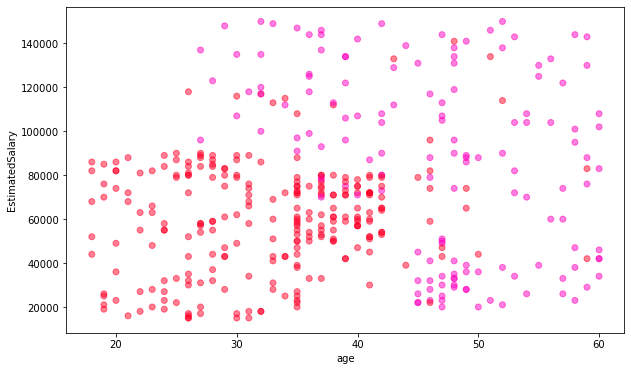

In [65]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(x['Age'], x['EstimatedSalary'], c=y, cmap='gist_rainbow', alpha=0.5)
plt.xlabel('age')
plt.ylabel('EstimatedSalary')
plt.show()

In [7]:
# k_means는 거리기반으로 단위 영향 줄이기 위한 scaling 진행

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(x), columns=x.columns) # scaled된 데이터

In [8]:
scaled_df

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [66]:
# numpy로 바꿈
x2 = scaled_df.to_numpy()

In [67]:
x2.shape

(400, 2)

## PCA

## K-means

In [68]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(x2)

KMeans(n_clusters=3, random_state=42)

In [69]:
# 굽집 결과
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0,

In [70]:
y_predict = km.predict(x2)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0,

In [71]:
# 각각 모은 샘플 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([139, 180,  81], dtype=int64))

## 군집 결과 시각화

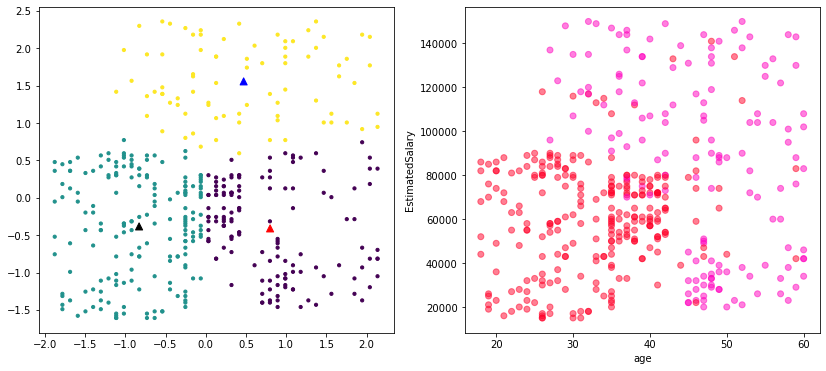

In [78]:
plt.figure(figsize=(1,6))

# k-means modeling
plt.subplot(1,2,1)
plt.scatter(x2[:,0], x2[:,1],
           c = km.labels_, marker='o', s=10)
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
            c=['r','k','b'], marker='^', s=50)

# 나이, 연봉으로 구매(0,1)산점도 그래프
plt.subplot(1,2,2)
plt.scatter(x['Age'], x['EstimatedSalary'], c=y, cmap='gist_rainbow', alpha=0.5)
plt.xlabel('age')
plt.ylabel('EstimatedSalary')
plt.show()

## 최적의 K개수 : elbow

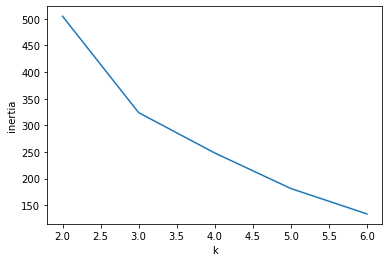

In [48]:
inertia=[]
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 여기는 엘보우 k개가 3이 나옴..

## 잘 군집 되었는지 평가

In [79]:
# 잘 군집되었는지 평가
# 작을수록 좋음
km.inertia_

323.84597021244855

### 궁금한 점 
- 두 개의 변수 외 x에 넣을 수 있는가?
- 더미화된 성별은 어떻게 훈련되는가?